In [ ]:
# Análise Exploratória dos Dados de Vendas do Walmart

#Este notebook realiza uma análise exploratória dos dados de vendas do Walmart.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
# definir caminho do arquivo
data_path = 'C:\\Users\\lealg\\OneDrive\\Mackenzie Ciencia de Dados\\2 Semestre\\Projeto Aplicado I\\Walmart_Sales.csv'

# carregar o arquivo
df = pd.read_csv(data_path)

In [13]:
# Preparar dados:
# Converter a coluna 'Date' para o tipo 'datetime'
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# converter Coluna de Temperatura para ° Celcius
df['Temperature'] = (df['Temperature'] - 32) * 5/9

In [14]:
# Analise exploratória
# primeiras linhas
print(df.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0     5.727778       2.572   
1      1 2010-02-12    1641957.44             1     3.616667       2.548   
2      1 2010-02-19    1611968.17             0     4.405556       2.514   
3      1 2010-02-26    1409727.59             0     8.127778       2.561   
4      1 2010-03-05    1554806.68             0     8.055556       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [15]:
# infosGerais
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


In [16]:
# descrição
df['Weekly_Sales'] = df['Weekly_Sales'] / 1_000_000
print(df.describe())

             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435   6435.000000   6435.000000   
mean     23.000000  2011-06-17 00:00:00      1.046965      0.069930   
min       1.000000  2010-02-05 00:00:00      0.209986      0.000000   
25%      12.000000  2010-10-08 00:00:00      0.553350      0.000000   
50%      23.000000  2011-06-17 00:00:00      0.960746      0.000000   
75%      34.000000  2012-02-24 00:00:00      1.420159      0.000000   
max      45.000000  2012-10-26 00:00:00      3.818686      1.000000   
std      12.988182                  NaN      0.564367      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     15.924324     3.358607   171.578394      7.999151  
min     -18.922222     2.472000   126.064000      3.879000  
25%       8.588889     2.933000   131.735000      6.891000  
50%      17.038889     3.445000   182.616521      7.874

In [26]:
# Verificação estatística das variáveis
selected_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

print("\nMínimo:")
print(df[selected_columns].min())

print("\nMédia:")
print(df[selected_columns].mean())

print("\nMaximo:")
print(df[selected_columns].max())

print("\nVariância:")
print(df[selected_columns].var())

print("\nDesvio padrão:")
print(df[selected_columns].std())




Mínimo:
Weekly_Sales      0.209986
Temperature     -18.922222
Fuel_Price        2.472000
CPI             126.064000
Unemployment      3.879000
dtype: float64

Média:
Weekly_Sales      1.046965
Temperature      15.924324
Fuel_Price        3.358607
CPI             171.578394
Unemployment      7.999151
dtype: float64

Maximo:
Weekly_Sales      3.818686
Temperature      37.855556
Fuel_Price        4.468000
CPI             227.232807
Unemployment     14.313000
dtype: float64

Variância:
Weekly_Sales       0.318510
Temperature      105.004799
Fuel_Price         0.210699
CPI             1548.950803
Unemployment       3.518944
dtype: float64

Desvio padrão:
Weekly_Sales     0.564367
Temperature     10.247185
Fuel_Price       0.459020
CPI             39.356712
Unemployment     1.875885
dtype: float64


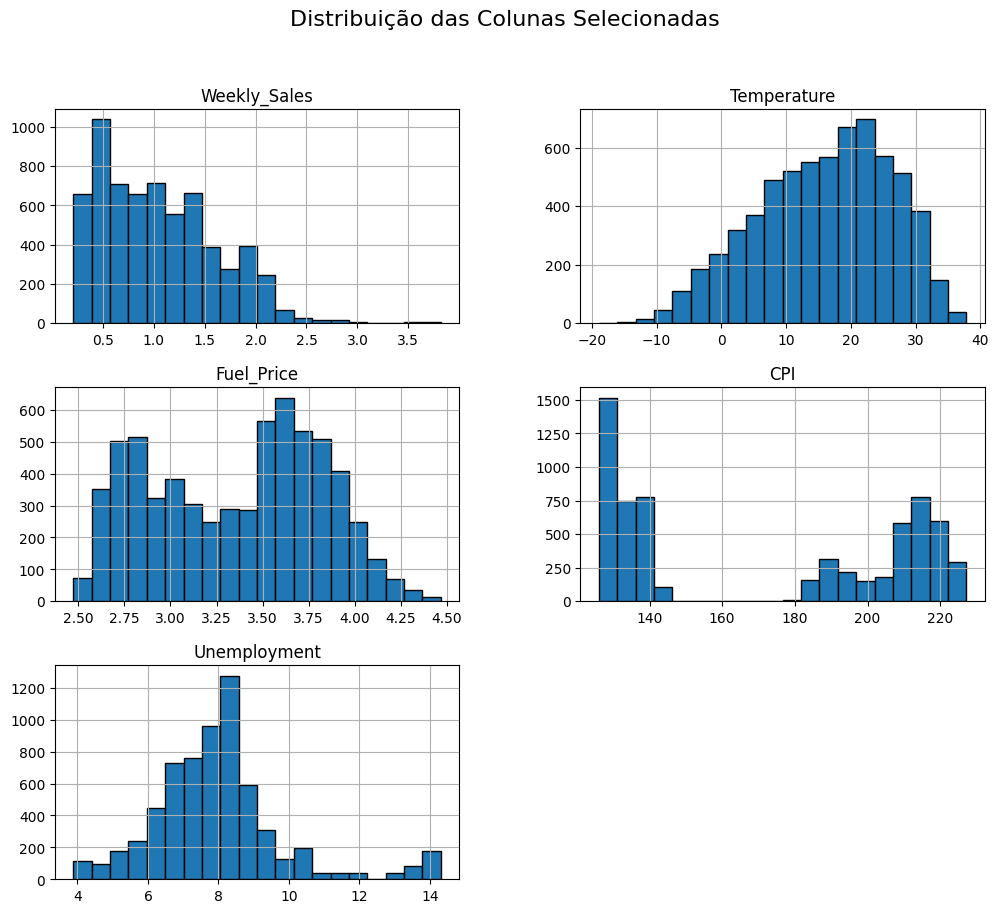

In [ ]:
# Histograma de Distribuição
df[selected_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribuição das Colunas Selecionadas', fontsize=16)
plt.show()




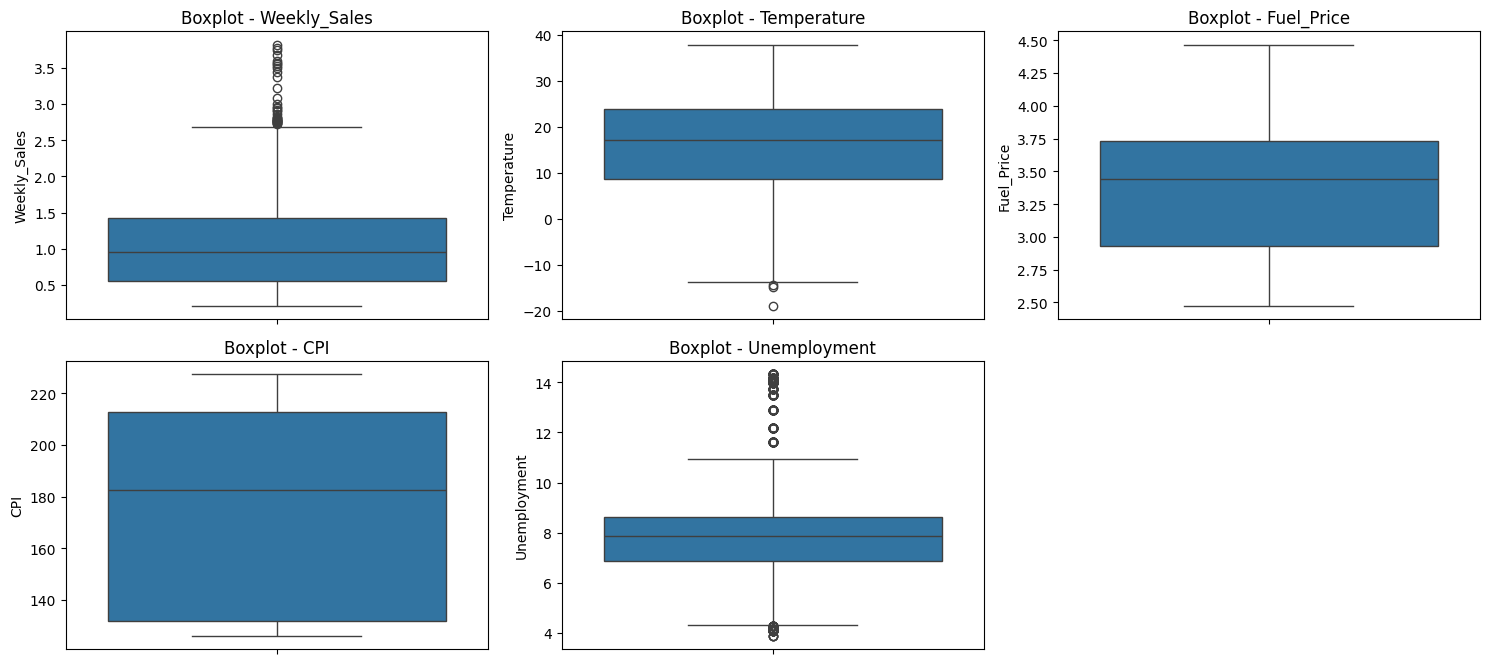

In [ ]:
# Verificação de outliers usando boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot - {column}')
plt.tight_layout()
plt.show()